# Read dataset

In [1]:
import pandas as pd
A = pd.read_csv("C:/users/HP/Downloads/AirPassengers.csv")

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# Convert to date time format

In [3]:
A.Month = pd.to_datetime(A.Month)

# Make month as index and drop it as column

In [4]:
A.index = A.Month
A = A.drop(labels=["Month"],axis=1)

In [5]:
A.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
A.columns = ["Passengers"]

# Plot and decompose

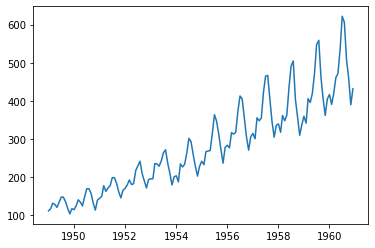

In [7]:
import matplotlib.pyplot as plt
plt.plot(A)

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(A,model='multiplicative')

<AxesSubplot:xlabel='Month'>

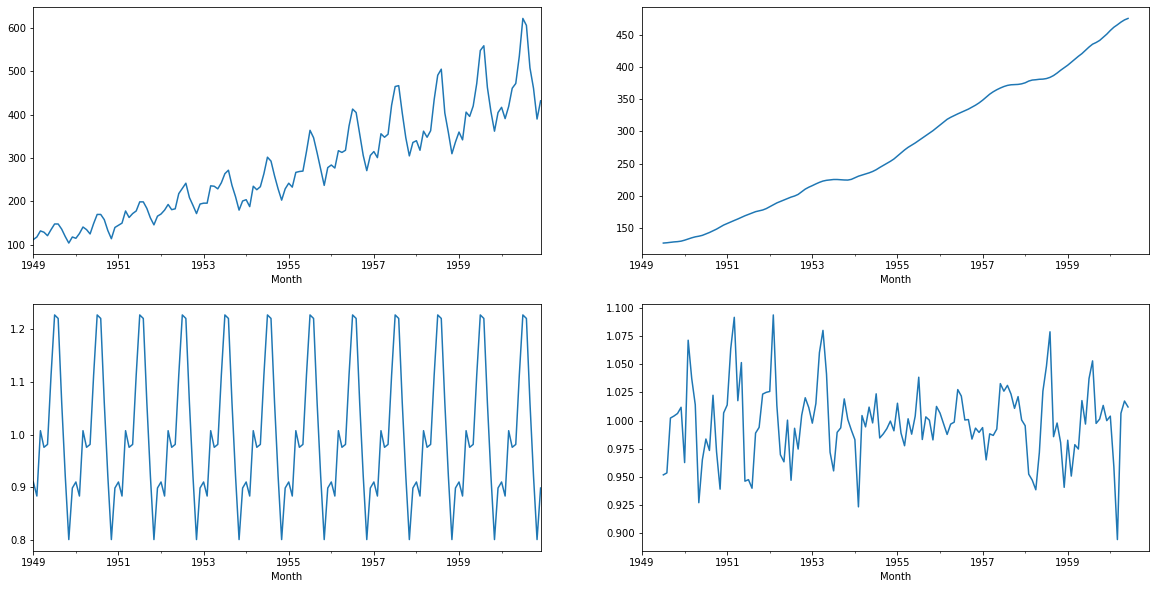

In [9]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
Q.observed.plot()

plt.subplot(2,2,2)
Q.trend.plot()

plt.subplot(2,2,3)
Q.seasonal.plot()

plt.subplot(2,2,4)
Q.resid.plot()

# Rolling mean and Rolling standard daviation

In [10]:
RM_Original = A.rolling(window=12).mean()
RST_Original = A.rolling(window=12).std()


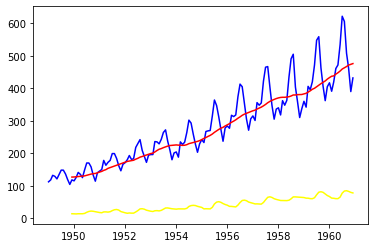

In [11]:
plt.plot(A,c="blue")
plt.plot(RM_Original,c="red")
plt.plot(RST_Original,c="yellow")

# Conversion attempt 1


Convert TS ----> Log

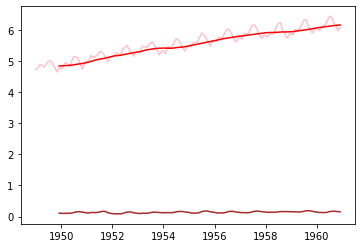

In [12]:
import numpy as np

log_A = np.log(A)
RM_LOG_A = log_A.rolling(window=12).mean()
RST_LOG_A = log_A.rolling(window=12).std()

plt.plot(log_A,c="pink")
plt.plot(RM_LOG_A,c="red")
plt.plot(RST_LOG_A,c="brown")

# Conversion attempt 2

logA - RM_logA

In [13]:
log_A = np.log(A)
RM_LOG_A = log_A.rolling(window=12).mean()

In [14]:
TS1 = log_A - RM_LOG_A


<AxesSubplot:xlabel='Month'>

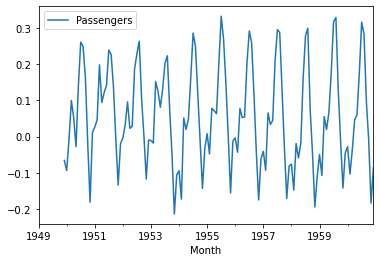

In [15]:
TS1.plot()


# Divide data in training and testing set

In [16]:
TS1_upd = TS1[TS1.Passengers.isna()==False]


In [17]:
TS1_upd.shape


(133, 1)

In [18]:
133*0.8


106.4

In [19]:
trd = TS1_upd[0:106]
tsd = TS1_upd[106:]

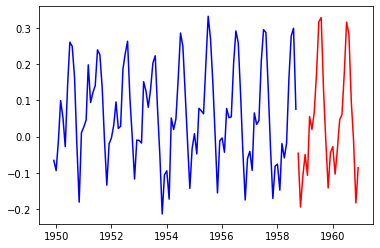

In [20]:
plt.plot(trd,c="blue")
plt.plot(tsd,c="red")

# Forecast

In [21]:
tsd


,Passengers
Month,
1958-10-01,-0.045657
1958-11-01,-0.193762
1958-12-01,-0.110499
1959-01-01,-0.049241
1959-02-01,-0.106598
1959-03-01,0.055385
1959-04-01,0.019679
1959-05-01,0.066365
1959-06-01,0.176286


In [25]:
from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [27]:
pred = model.predict(start="1958-10-01", end="1960-12-01")


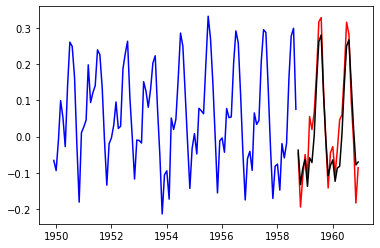

In [28]:
plt.plot(trd,c="blue")
plt.plot(tsd,c="red")
plt.plot(pred,c="black")

# Convert value into its original form

Q = log(A) - RM(log(A)) log(A) = Q + RM(log(A)) A = exp(Q + RM(log(A)))


In [29]:
R = RM_LOG_A[RM_LOG_A.Passengers.isna()==False]


In [30]:
tsd.shape


(27, 1)

In [31]:
pred = pd.DataFrame(np.exp(pred + RM_LOG_A.tail(27).Passengers),columns=A.columns)


In [33]:
pred


,Passengers
1958-10-01,362.074874
1958-11-01,329.665472
1958-12-01,345.022132
1959-01-01,355.254891
1959-02-01,331.825018
1959-03-01,362.397462
1959-04-01,361.557750
1959-05-01,394.308061
1959-06-01,459.595119
1959-07-01,518.826980
